## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math

## Load data

In [2]:
# Load the data files into different DataFrames
# import megaline_users as users
users = pd.read_csv('FileLocation/megaline_users.csv')

# import megaline_calls as calls
calls = pd.read_csv('FileLocation/megaline_calls.csv')

# import megaline_messages as messages
messages = pd.read_csv('FileLocation//megaline_messages.csv')

# import megaline_internet as internet
internet = pd.read_csv('FileLocation//megaline_internet.csv')

# import megaline_plans as plans
plans = pd.read_csv('FileLocation//megaline_plans.csv')

## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Print a sample of data for plans
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-info"> 
<li>Column names don't include spaces or capital letters.
<li>Columns  messages_included, mb_per_month_included, minutes_included, usd_monthly_pay, and usd_per_gb have data types of int64, which is suitable for storing integers. 
<li>Columns usd_per_message and usd_per_minute have data types of float64, which is appropriate for storing floating-point numbers (representing prices with decimal values).
<li>The plan_name column has a data type of object, which is correclty representing text/string data.
<li>There is no missing values.</div>

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",12/24/2018,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",8/13/2018,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",10/21/2018,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",1/28/2018,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",5/23/2018,surf,NaN


<div class="alert alert-info"> 
    <li>Column names don't include spaces or capital letters.
    <li>Columns user_id and age have data types of int64, which is suitable for storing integers. 
        <ul><li> There isn't a lot of mathmatical meaning to user_id and no arthmatic we would do with these numbers. So it can be changed to object/string. But we will leave this as is for now</ul></li>
    <li>Columns reg_date and churn_date has data types of object, which is NOT appropriate for representing dates and needs to be revised to datetime</li>
    <li>Columns first_name, last_name, city, and plan has a data type of object, which is appropriate for representing text/string data.</li>
    <li>Column churn_date has 466 missing data which indicates that 466 users are still using Megaline. However, we will not change this for now.</li></div>

### Fix Data

In [7]:
# change reg_date and churn_date into datetime data type. Need to add errors='coerce' since churn_date column has missing values.
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

# check the data type of reg_date and churn_date columns
print(users['reg_date'].dtype)
print(users['churn_date'].dtype)

datetime64[ns]
datetime64[ns]


### Enrich Data

<div class="alert alert-info">
We may or maynot find filling in missing data of 'churn_date' column to be useful. So for now, missing values are left as is.
    </div>

## Calls

In [8]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                137735 non-null  object 
 1   user_id           137735 non-null  int64  
 2   call_date         137735 non-null  object 
 3   duration          137735 non-null  float64
 4   roundup_duration  137735 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.3+ MB


In [9]:
# Print a sample of data for calls
calls.head()

,id,user_id,call_date,duration,roundup_duration
0,1000_145,1000,12/27/2018,13.66,14
1,1000_247,1000,12/27/2018,14.48,15
2,1000_309,1000,12/28/2018,5.76,6
3,1000_380,1000,12/30/2018,4.22,5
4,1000_388,1000,12/31/2018,2.20,3


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

 <div class="alert alert-info">  
<li>id column includes '_' sign. 4 digits before the '_' is the user_id and true id for call is represented by the 2 digits that come after. Since we already have a columnn that identifies user_id, we can remove the first 4 digits + '_' from id column and make id column into integer type. But we don't see the need for this, so we'll leave it as is for now.
<li>IDs are not to be mathmatically used for our analysis other than being counted, so I don't see the point of altering the data yet. 
<li>call_date is showing as object/string. However, these are specific date and would be best if it's changed to datetime
<li> Duration is saved as float. Since Megaline rounds up EACH call to its nearest minute, to make our math simpler, it would be best to round this up to whole minutes and make an integer instead of a float.
<li> 0s in duration will not undermine the calculations since duration used is imporantat and 0 will correctly represent usage by customers. Also, when calculating the revenue, we can added a separate line to calculate the minimum which is charged regardless of ussage.
</div>

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [10]:
# change call_date column to datetime data type
calls['call_date'] = pd.to_datetime(calls['call_date'])

# confirm data type has changed
print(calls['call_date'].dtypes)

datetime64[ns]


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [11]:
# round up the duration column to nearest whole number
calls['duration'] = np.ceil(calls['duration']).astype(int)

# change data type of duration to integer
# calls['duration']=calls['duration'].astype(int)

# check data type changed
print(calls['duration'].dtypes)

# check values
calls.head()

int32


,id,user_id,call_date,duration,roundup_duration
0,1000_145,1000,2018-12-27,14,14
1,1000_247,1000,2018-12-27,15,15
2,1000_309,1000,2018-12-28,6,6
3,1000_380,1000,2018-12-30,5,5
4,1000_388,1000,2018-12-31,3,3


## Messages

In [12]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Print a sample of data for messages
messages.head()

,id,user_id,message_date
0,1000_125,1000,12/27/2018
1,1000_160,1000,12/31/2018
2,1000_223,1000,12/31/2018
3,1000_251,1000,12/27/2018
4,1000_255,1000,12/26/2018


<div class="alert alert-info"> 
    <li>there are no missing data</li>
    <li> all columns are in lower case and doesn't have spaces </li>
<li>id column includes '_' sign. 4 digits before the '_' is the user_id and true id for message is represented by the 2 digits that come after. Since we already have a columnn that identifies user_id, we can remove the first 4 digits + '_' from id column and make id column into integer type. But we don't see the need for this, so we'll leave it as is for now.
<li>However, IDs are not to be mathmatically used for our analysis other than being counted, so I don't see the point of altering the data yet. 
<li>message_date is showing as object/string. However, these are specific date and would be best if it's changed to datetime
</div>

### Fix data

In [14]:
# change message_date column to datetime data type
messages['message_date'] = pd.to_datetime(messages['message_date'])

# confirm data type has changed
print(messages['message_date'].dtypes)

datetime64[ns]


### Enrich data

<div class="alert alert-info"> 
    There is no other changes needed at this time

## Internet

In [15]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Print a sample of data for the internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,12/29/2018,89.86
1,1000_204,1000,12/31/2018,0.00
2,1000_379,1000,12/28/2018,660.40
3,1000_413,1000,12/26/2018,270.99
4,1000_442,1000,12/27/2018,880.22


 <div class="alert alert-info"> 
    <li>there are no missing data</li>
    <li> all columns are in lower case and doesn't have </li>
<li>id column includes '_' sign. 4 digits before the '_' is the user_id and true id for call is represented by the 2 digits that come after. Since we already have a columnn that identifies user_id, we can remove the first 4 digits + '_' from id column and make id column into integer type. But we don't see the need for this, so we'll leave it as is for now.
<li>IDs are not to be mathmatically used for our analysis other than being counted, so I don't see the point of altering the data yet. 
<li>session_date is showing as object/string. However, these are specific date and would be best if it's changed to datetime
<li> mb_used is in float. This is appropriate to calculate monthly since individual web sessions are not rounded up
<li> 0s mb_used will not undermine the calculations since total number of GB used is important and 0 will correctly represent usage by customers. Also, when calcualting the revenue, we can add a separate line to calculate the minimum which is charged regardless of the usage. 
</div>

### Fix data

In [17]:
# change session_date data type to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# check data type of session_date
print(internet['session_date'].dtype)

datetime64[ns]


### Enrich data

 <div class="alert alert-info">  There is no additioal changes needed at this time

## Study plan conditions

In [18]:
# Print out the plan conditions and make sure they are clear for you
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

In [19]:
# Calculate the number of calls made by each user per month. Save the result.

# extract month from call_date and add it to column call_month
calls['month'] = calls['call_date'].dt.month
# count the number of ids for number of calls. Group the data by 'user_id' and 'call_month'
calls_per_user_m = calls.groupby(['user_id', 'month']).agg(
    num_calls=('id', 'count')).reset_index()
# print to see the result
display(calls_per_user_m.head())
print()
calls_per_user_m.info()

,user_id,month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    2258 non-null   int64
 1   month      2258 non-null   int32
 2   num_calls  2258 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 44.2 KB


In [20]:
# Calculate the amount of minutes spent by each user per month. Save the result.

# call month is already added. Now group the data by user_id and call_month then add the duration  per month
dur_per_user_m = calls.groupby(['user_id', 'month']).agg(
    m_dur=('duration', 'sum')).reset_index()
# print to see the result
display(dur_per_user_m.head())
print()
dur_per_user_m.info()

,user_id,month,m_dur
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  2258 non-null   int64
 1   month    2258 non-null   int32
 2   m_dur    2258 non-null   int32
dtypes: int32(2), int64(1)
memory usage: 35.4 KB


In [21]:
# Calculate the number of messages sent by each user per month. Save the result.

# extract month from message_date and add it to column message_month
messages['month'] = messages['message_date'].dt.month
# count the number of ids for number of messages. Group the data by 'user_id' and 'message_month'
messages_per_user_m = messages.groupby(['user_id', 'month']).agg(
    num_message=('id', 'count')).reset_index()
# print to see the result
display(messages_per_user_m.head())
print()
messages_per_user_m.info()

,user_id,month,num_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      1806 non-null   int64
 1   month        1806 non-null   int32
 2   num_message  1806 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 35.4 KB


In [22]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

# extract month from session_date and add it to column session_month
internet['month'] = internet['session_date'].dt.month
# Group the data by 'user_id' and 'session_month', then sum the mb_used
session_per_user_m = internet.groupby(['user_id', 'month']).agg(
    session_m=('mb_used', 'sum')).reset_index()
# print to see the result
display(session_per_user_m.head())
print()
session_per_user_m.info()

,user_id,month,session_m
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2277 non-null   int64  
 1   month      2277 non-null   int32  
 2   session_m  2277 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 44.6 KB


In [23]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# merge calls_per_user_m and dur_per_user_m
monthly_use_per_user = calls_per_user_m.merge(
    dur_per_user_m, on=['user_id', 'month'], how='outer')

# merge monthly_use_per_user and messages_per_user_m
monthly_use_per_user = monthly_use_per_user.merge(
    messages_per_user_m, on=['user_id', 'month'], how='outer')

# merge monthly_use_per_user and session_per_user_m and

monthly_use_per_user = monthly_use_per_user.merge(
    session_per_user_m, on=['user_id', 'month'], how='outer')

# change the session_m from MB to GB round up to the whole number
monthly_use_per_user['session_m'] = np.ceil(
    monthly_use_per_user['session_m']/1024)

# change session_m to integer in order to prevent any calculation errors in the revenue stage
monthly_use_per_user['session_m'].fillna(0, inplace=True)
monthly_use_per_user['session_m'] = monthly_use_per_user['session_m'].astype(
    int)

display(monthly_use_per_user.head())

,user_id,month,num_calls,m_dur,num_message,session_m
0,1000,12,16.0,124.0,11.0,2
1,1001,8,27.0,182.0,30.0,7
2,1001,9,49.0,315.0,44.0,14
3,1001,10,65.0,393.0,53.0,22
4,1001,11,64.0,426.0,36.0,19


In [24]:
# Add the plan information

# merge monthly_use_per_user and session_per_user_m
monthly_use_per_user = monthly_use_per_user.merge(
    users[['user_id', 'plan']], on='user_id', how='left')

# change month, num_calls, m_dur_,num_messge columns to integer
monthly_use_per_user['month'] = pd.to_numeric(
    monthly_use_per_user['month'], errors='coerce').astype('Int64')
monthly_use_per_user['num_calls'] = pd.to_numeric(
    monthly_use_per_user['num_calls'], errors='coerce').astype('Int64')
monthly_use_per_user['m_dur'] = pd.to_numeric(
    monthly_use_per_user['m_dur'], errors='coerce').astype('Int64')
monthly_use_per_user['num_message'] = pd.to_numeric(
    monthly_use_per_user['num_message'], errors='coerce').astype('Int64')

display(monthly_use_per_user.head())
monthly_use_per_user.info()

,user_id,month,num_calls,m_dur,num_message,session_m,plan
0,1000,12,16,124,11,2,ultimate
1,1001,8,27,182,30,7,surf
2,1001,9,49,315,44,14,surf
3,1001,10,65,393,53,22,surf
4,1001,11,64,426,36,19,surf


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      2293 non-null   int64 
 1   month        2293 non-null   Int64 
 2   num_calls    2258 non-null   Int64 
 3   m_dur        2258 non-null   Int64 
 4   num_message  1806 non-null   Int64 
 5   session_m    2293 non-null   int32 
 6   plan         2293 non-null   object
dtypes: Int64(4), int32(1), int64(1), object(1)
memory usage: 125.5+ KB


In [25]:
# Calculate the monthly revenue for each user

# fill na values with 0
monthly_use_per_user = monthly_use_per_user.copy().fillna(0)


def func(df):

    # just to make it more convenient and to be able to get data with loc + plan_name, I set plan_name as index:
    df_plans = plans.set_index('plan_name')

    revenue = df_plans.loc[df.plan]['usd_monthly_pay']

    revenue += (max(0, (df['m_dur'] - df_plans.loc[df.plan]['minutes_included']) * df_plans.loc[df.plan]['usd_per_minute'])
                + max(0, (df['num_message'] - df_plans.loc[df.plan]
                      ['messages_included']) * df_plans.loc[df.plan]['usd_per_message'])
                + max(0, (np.ceil(df['session_m']) - df_plans.loc[df.plan]['mb_per_month_included']/1024) * df_plans.loc[df.plan]['usd_per_gb']))

    return revenue


monthly_use_per_user['revenue'] = monthly_use_per_user.apply(func, axis=1)

display(monthly_use_per_user)

,user_id,month,num_calls,m_dur,num_message,session_m,plan,revenue
0,1000,12,16,124,11,2,ultimate,70.00
1,1001,8,27,182,30,7,surf,20.00
2,1001,9,49,315,44,14,surf,20.00
3,1001,10,65,393,53,22,surf,90.09
4,1001,11,64,426,36,19,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1349,12,0,0,61,13,surf,20.33
2289,1361,5,0,0,2,2,surf,20.00
2290,1482,10,0,0,2,0,ultimate,70.00
2291,1108,12,0,0,0,1,ultimate,70.00


## Study user behaviour

### Calls

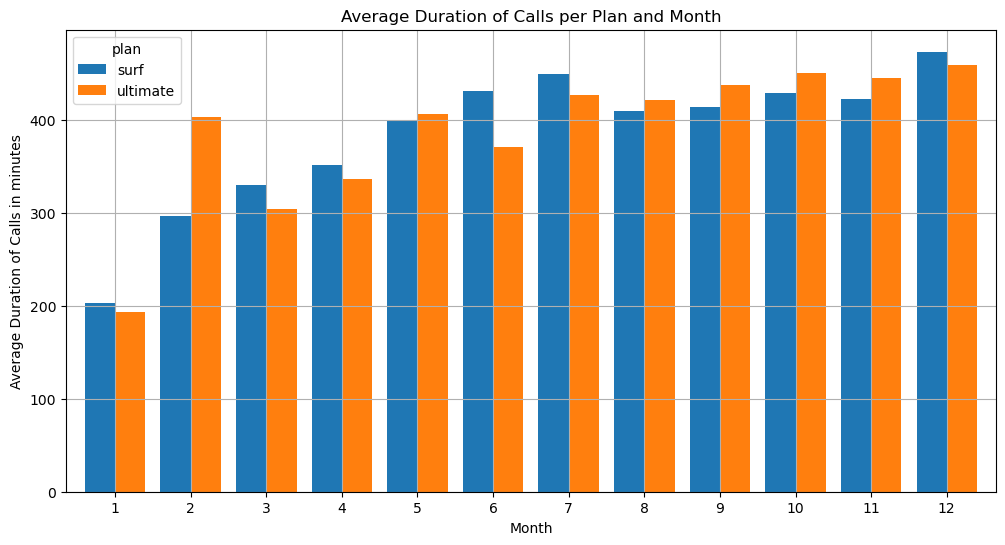

In [26]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Group the monthly_use_per_user by 'plan' and 'month', calculate the mean duration, and reset the index
avg_duration_per_plan_month = monthly_use_per_user.groupby(
    ['plan', 'month'])['m_dur'].mean().reset_index()

# Pivot the table for easier plotting
avg_duration_m_pivot = avg_duration_per_plan_month.pivot(
    index='month', columns='plan', values='m_dur')

# Create the bar plot
avg_duration_m_pivot.plot(
    kind='bar',
    width=0.8,
    figsize=(12, 6),
    title='Average Duration of Calls per Plan and Month',
    xlabel='Month',
    ylabel='Average Duration of Calls in minutes',
    grid=True)
plt.xticks(rotation=0)
plt.show()

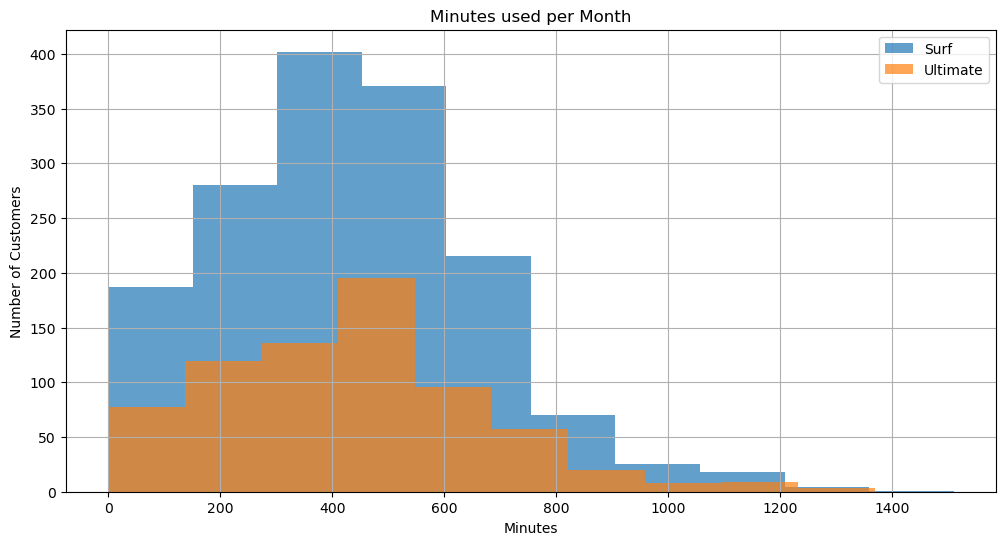

total call duration used by Surf plan users: 674423
total call duration used by Ultimate plan users: 309924


In [27]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# Create and save how much surf plan users used per month
total_surf_used = monthly_use_per_user[monthly_use_per_user['plan']
                                       == 'surf']['m_dur']
total_surf_used = total_surf_used.reset_index(drop=True)

total_surf_used.plot(kind='hist',
                     figsize=(12, 6),
                     title='Minutes used per Month',
                     alpha=0.7,
                     grid=True,
                     label='Surf')

# Create and save how much ultimatee plan users used per month
total_ult_used = pd.DataFrame()
total_ult_used = monthly_use_per_user[monthly_use_per_user['plan']
                                      == 'ultimate']['m_dur']
total_ult_used = total_ult_used.reset_index(drop=True)

total_ult_used.plot(kind='hist',
                    figsize=(12, 6),
                    title='Minutes used per Month',
                    alpha=0.7,
                    grid=True,
                    label='Ultimate')
bin_edges = np.arange(0, 1700, 200)
plt.title('Minutes used per Month')
plt.xlabel('Minutes')
plt.ylabel('Number of Customers')
plt.legend(loc='upper right')
plt.show()

print('total call duration used by Surf plan users:', total_surf_used.sum())
print('total call duration used by Ultimate plan users:', total_ult_used.sum())

In [28]:
# Calculate the mean and the variance of the monthly call duration

monthly_use_per_user.pivot_table(index='plan', values=['m_dur', 'num_message', 'session_m'],
                                 aggfunc=['mean', 'std', 'var'])

mean                                std                        \
               m_dur num_message  session_m       m_dur num_message session_m   
plan                                                                            
surf      428.749523   31.159568  16.670693   234.45315   33.566717  7.847522   
ultimate      430.45   37.551389  17.306944  240.508762   34.767179  7.670108   

                   var                         
                 m_dur  num_message session_m  
plan                                           
surf      54968.279461  1126.724522  61.58360  
ultimate  57844.464812  1208.756744  58.83055

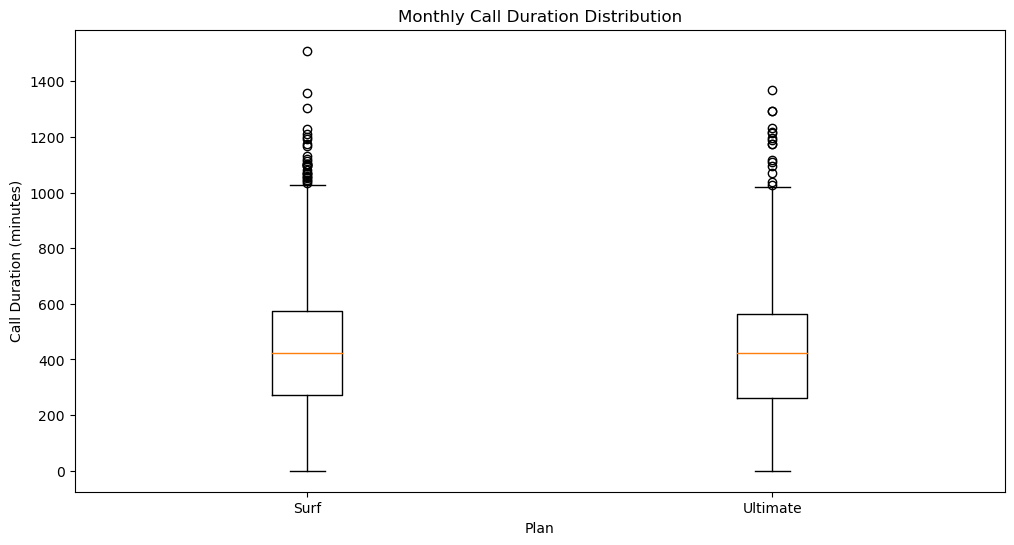

In [29]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Filter data for surf and ultimate plans
surf_data = monthly_use_per_user[monthly_use_per_user['plan']
                                 == 'surf']['m_dur']
ultimate_data = monthly_use_per_user[monthly_use_per_user['plan']
                                     == 'ultimate']['m_dur']

# Create a list of data to plot
data_to_plot = [surf_data.dropna(), ultimate_data.dropna()]

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot, labels=['Surf', 'Ultimate'])
plt.title('Monthly Call Duration Distribution')
plt.xlabel('Plan')
plt.ylabel('Call Duration (minutes)')
plt.show()

 <div class="alert alert-info"> 
<li>There is no significant difference between the Surf and Ultimate plan user behavior when it comes to how much they call throughout the months except for in Feburary. In Feburary, Ultimate plan users have used over 450 minutes where as Surf plan users used approximately 300 minutes on average.
<li>When total minutes are compared between the two plans, there are significantly more minutes used by the Surf plan users due to the fact that there are more Surf plan users.
<li>Median and interquartile range of call duration between the two plan is similar

### Messages

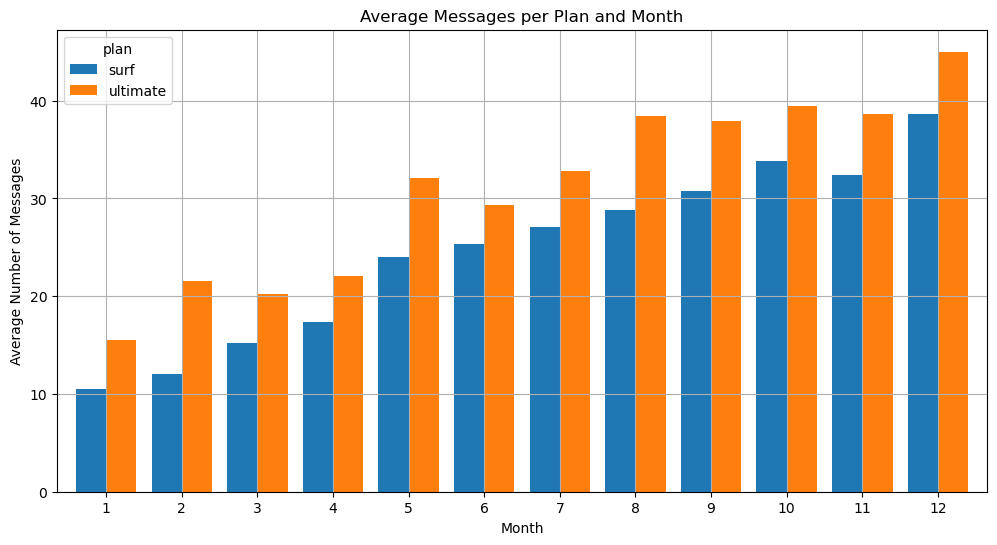

In [30]:
# Compare the number of messages users of each plan tend to send each month

# Group the monthly_use_per_user by 'plan' and 'month', calculate the mean of number of messages, and reset the index
avg_msg_per_plan_month = monthly_use_per_user.groupby(
    ['plan', 'month'])['num_message'].mean().reset_index()

# Pivot the table for easier plotting
avg_msg_per_plan_month = avg_msg_per_plan_month.pivot(
    index='month', columns='plan', values='num_message')

# Create the bar plot
avg_msg_per_plan_month.plot(
    kind='bar',
    width=0.8,
    figsize=(12, 6),
    title='Average Messages per Plan and Month',
    xlabel='Month',
    ylabel='Average Number of Messages',
    grid=True)
plt.xticks(rotation=0)
plt.show()

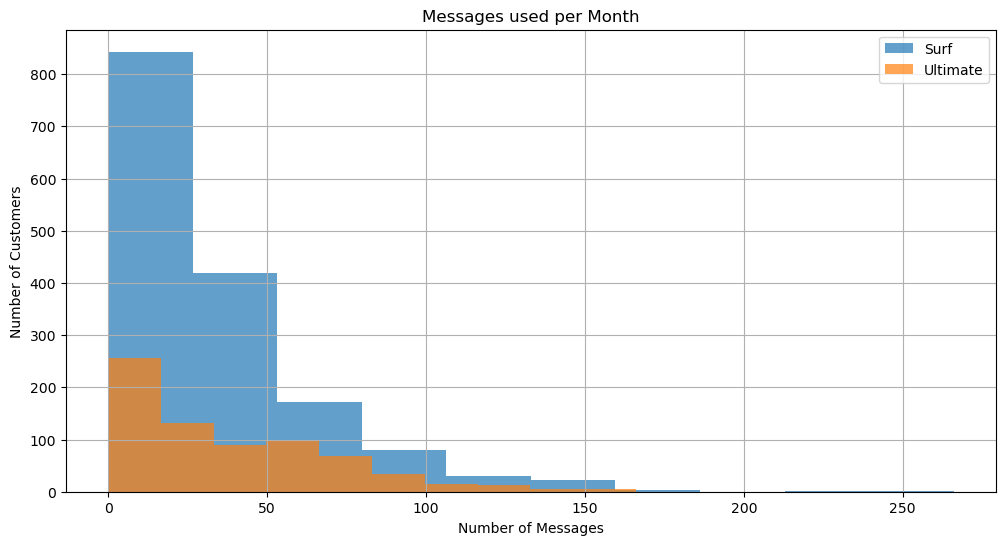

total messages used by Surf plan users: 49014
total messages used by Ultimate plan users: 27037


In [31]:
# Compare the number of messages used by users of each plan require each month. Plot a histogram.

# Create and save how much surf plan users used per month
total_surf_used_msg = monthly_use_per_user[monthly_use_per_user['plan'] == 'surf']

total_surf_used_msg['num_message'].plot(kind='hist',
                                        figsize=(12, 6),
                                        title='Messages used per Month',
                                        alpha=0.7,
                                        grid=True,
                                        label='Surf')

# Create and save how much ultimatee plan users used per month
total_ult_used_msg = monthly_use_per_user[monthly_use_per_user['plan'] == 'ultimate']

total_ult_used_msg['num_message'].plot(kind='hist',
                                       figsize=(12, 6),
                                       title='Messages used per Month',
                                       alpha=0.7,
                                       grid=True,
                                       label='Ultimate')
bin_edges = np.arange(0, 280, 50)
plt.title('Messages used per Month')
plt.xlabel('Number of Messages')
plt.ylabel('Number of Customers')
plt.legend(loc='upper right')
plt.show()

print('total messages used by Surf plan users:',
      total_surf_used_msg['num_message'].sum())
print('total messages used by Ultimate plan users:',
      total_ult_used_msg['num_message'].sum())

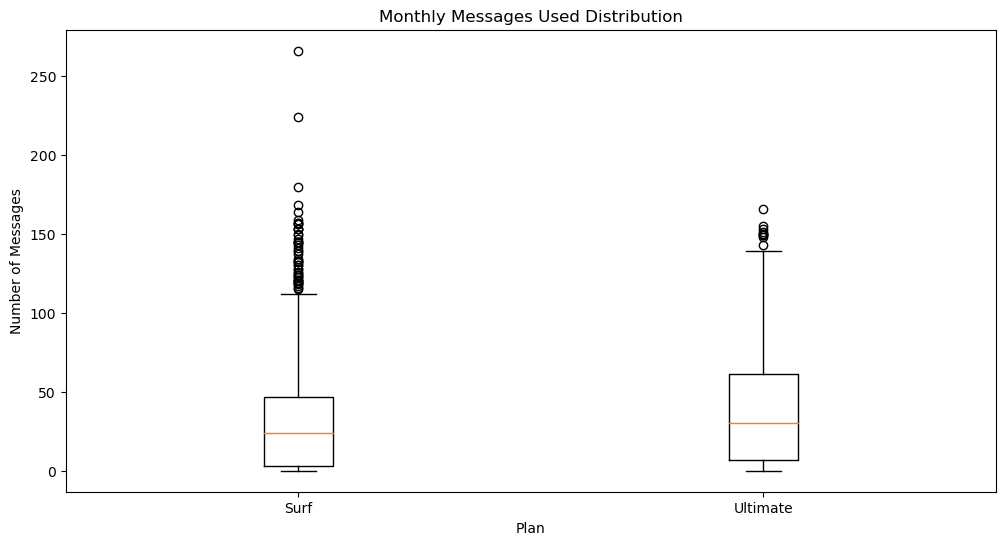

In [32]:
# Plot a boxplot to visualize the distribution of the monthly messages used

# Filter data for surf and ultimate plans
surf_data_msg = monthly_use_per_user[monthly_use_per_user['plan']
                                     == 'surf']['num_message']
ultimate_data_msg = monthly_use_per_user[monthly_use_per_user['plan']
                                         == 'ultimate']['num_message']

# Create a list of data to plot
data_to_plot_msg = [surf_data_msg.dropna(), ultimate_data_msg.dropna()]

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot_msg, labels=['Surf', 'Ultimate'])
plt.title('Monthly Messages Used Distribution')
plt.xlabel('Plan')
plt.ylabel('Number of Messages')
plt.show()

In [33]:
# Calculate the mean and the variance of the monthly text usage

monthly_use_per_user.pivot_table(index='plan', values=['m_dur', 'num_message', 'session_m'],
                                 aggfunc=['mean', 'std', 'var'])

mean                                std                        \
               m_dur num_message  session_m       m_dur num_message session_m   
plan                                                                            
surf      428.749523   31.159568  16.670693   234.45315   33.566717  7.847522   
ultimate      430.45   37.551389  17.306944  240.508762   34.767179  7.670108   

                   var                         
                 m_dur  num_message session_m  
plan                                           
surf      54968.279461  1126.724522  61.58360  
ultimate  57844.464812  1208.756744  58.83055

 <div class="alert alert-info"> 
    <li>On average, Ultimate plan users text more than Surf plan users
    <li>However, message used per month shows that Ultimate plan users vary between 0-200 text messages with most text messages being sent are 100 or less where as Surf plan users' number of text vary between 0-1600 with most text messages being sent are 400-500.
    <li>Median and interquartile range of text used are different between two plan holders. Ultimate plan users' mean, interquartile, and maximum is higher than Surf plan users
    <li>However, there are a lot of Surf plan users who are outliers who use more than 150 text a month

### Internet

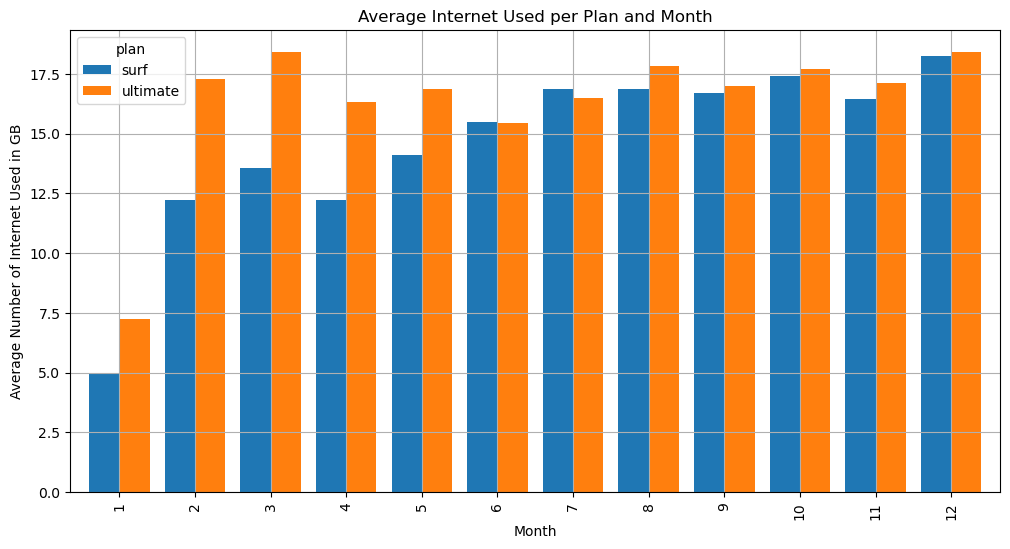

In [34]:
# Compare the amount of internet traffic consumed by users per plan

# Group the monthly_use_per_user by 'plan' and 'month', calculate internet usage, and reset the index
avg_int_per_plan_month = monthly_use_per_user.groupby(
    ['plan', 'month'])['session_m'].mean().reset_index()

# Pivot the table for easier plotting
avg_int_per_plan_month = avg_int_per_plan_month.pivot(
    index='month', columns='plan', values='session_m')

# Create the bar plot
avg_int_per_plan_month.plot(
    kind='bar',
    width=0.8,
    figsize=(12, 6),
    title='Average Internet Used per Plan and Month',
    xlabel='Month',
    ylabel='Average Number of Internet Used in GB',
    grid=True)

plt.show()

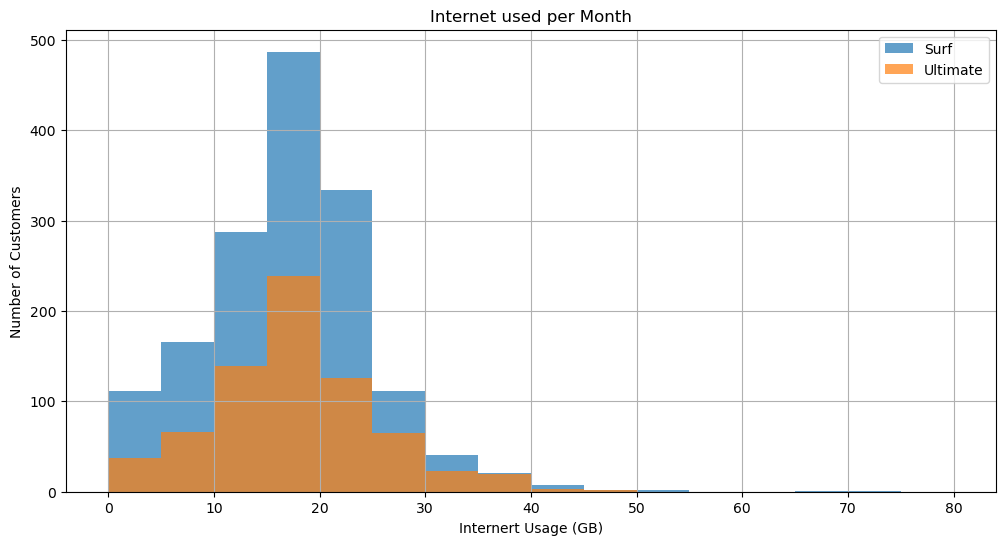

total internet used by Surf plan users: 26223
total internet used by Ultimate plan users: 12461


In [35]:
# Compare the internet used by users of each plan require each month. Plot a histogram.

# Create and save how much surf plan users used per month
total_surf_used_int = monthly_use_per_user[monthly_use_per_user['plan']
                                           == 'surf']['session_m']
total_surf_used_int = total_surf_used_int.reset_index(drop=True)

total_surf_used_int.plot(kind='hist',
                         figsize=(12, 6),
                         title='Internet used per Month',
                         alpha=0.7,
                         bins=[0, 5, 10, 15, 20, 25, 30, 35, 40,
                               45, 50, 55, 60, 65, 70, 75, 80],
                         grid=True,
                         label='Surf')

# Create and save how much ultimatee plan users used per month
total_ult_used_int = pd.DataFrame()
total_ult_used_int = monthly_use_per_user[monthly_use_per_user['plan']
                                          == 'ultimate']['session_m']
total_ult_used_int = total_ult_used_int.reset_index(drop=True)

total_ult_used_int.plot(kind='hist',
                        figsize=(12, 6),
                        title='Internet used per Month',
                        alpha=0.7,
                        bins=[0, 5, 10, 15, 20, 25, 30, 35, 40,
                              45, 50, 55, 60, 65, 70, 75, 80],
                        grid=True,
                        label='Ultimate')
bin_edges = np.arange(0, 1400, 100)
plt.title('Internet used per Month')
plt.xlabel('Internert Usage (GB)')
plt.ylabel('Number of Customers')
plt.legend(loc='upper right')
plt.show()

print('total internet used by Surf plan users:', total_surf_used_int.sum())
print('total internet used by Ultimate plan users:', total_ult_used_int.sum())

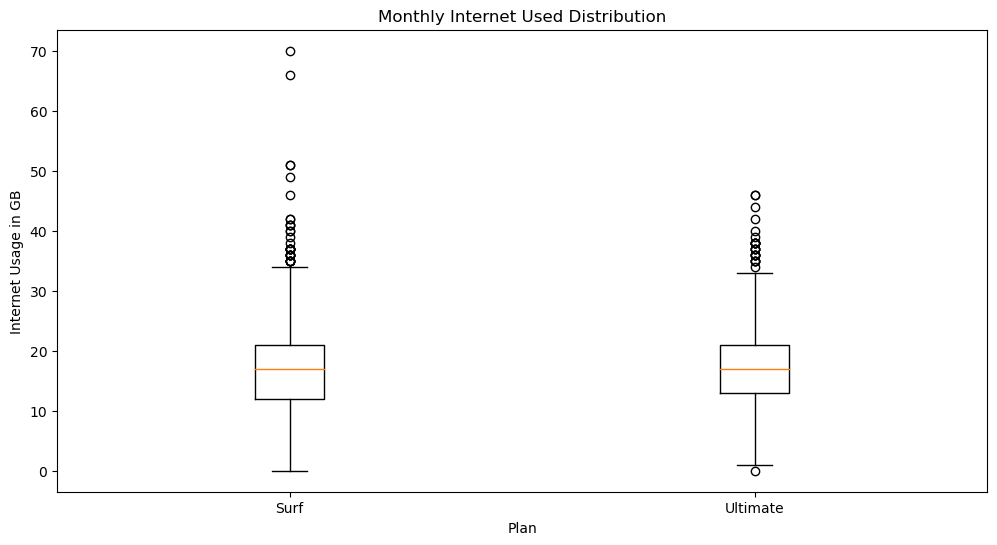

In [36]:
# Plot a boxplot to visualize the distribution of the monthly internet used

# Filter data for surf and ultimate plans
surf_data_int = monthly_use_per_user[monthly_use_per_user['plan']
                                     == 'surf']['session_m']
ultimate_data_int = monthly_use_per_user[monthly_use_per_user['plan']
                                         == 'ultimate']['session_m']

# Create a list of data to plot
data_to_plot_int = [surf_data_int.dropna(), ultimate_data_int.dropna()]

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot_int, labels=['Surf', 'Ultimate'])
plt.title('Monthly Internet Used Distribution')
plt.xlabel('Plan')
plt.ylabel('Internet Usage in GB')
plt.show()

In [37]:
# Calculate the mean and the variance of the monthly internet usage

# mean of surf montly internet usage
avg_surf_int = monthly_use_per_user[monthly_use_per_user['plan']
                                    == 'surf']['session_m'].mean()
# variance of surf monthly internet usage
var_surf_int = np.var(
    monthly_use_per_user[monthly_use_per_user['plan'] == 'surf']['session_m'])
# standard deviation of monthly internet usage
std_surf_int = math.sqrt(var_surf_int)

print("Average internet usage of surf plan: ", avg_surf_int)
print("Variance internet usage of surf plan: ", var_surf_int)
print("Internet usage standard deviation of surf plan customers:", std_surf_int)
print()

# mean of ultimate montly internet usage
avg_ult_int = monthly_use_per_user[monthly_use_per_user['plan']
                                   == 'ultimate']['session_m'].mean()
# variance of ultimate monthly internet usage
var_ult_int = np.var(
    monthly_use_per_user[monthly_use_per_user['plan'] == 'ultimate']['session_m'])
# standard deviation of monthly internet usage
std_ult_int = math.sqrt(var_ult_int)

print("Average internet usage of ultimate plan: ", avg_ult_int)
print("Variance internet usageof ultimate plan: ", var_ult_int)
print("Internet usage standard deviation of ultimate plan customers:", std_ult_int)

Average internet usage of surf plan:  16.670692943420217
Variance internet usage of surf plan:  61.544449424470294
Internet usage standard deviation of surf plan customers: 7.845027050588818

Average internet usage of ultimate plan:  17.306944444444444
Variance internet usageof ultimate plan:  58.748840663580175
Internet usage standard deviation of ultimate plan customers: 7.664779231235572


<div class="alert alert-info">
    <li> An average Ultimate plan users internet usage is similar to that of a Surf plan user or higher
    <li> However, the absolute number of internet usage between two plan users are compared, Surf plan uses more internet
    <li>Median,interquartile, maximum range of internet usage similar between two plan holders
    <li>However, there are a lot of Surf plan users who are outliers who use more than 35GB in a month

## Revenue

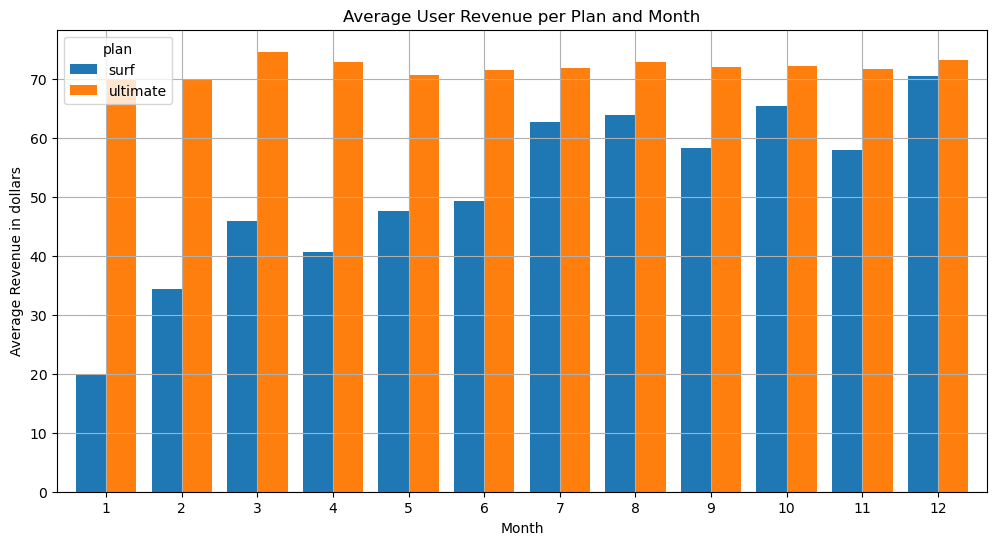

In [38]:
# Compare average revenue per each plan per each distinct month. Plot a bar plat to visualize it.

# Group the monthly_use_per_user by 'plan' and 'month', calculate the mean revenue, and reset the index
avg_revenue_per_plan_month = monthly_use_per_user.groupby(
    ['plan', 'month'])['revenue'].mean().reset_index()

# Pivot the table for easier plotting
avg_revenue_m_pivot = avg_revenue_per_plan_month.pivot(
    index='month', columns='plan', values='revenue')

# Create the bar plot
avg_revenue_m_pivot.plot(
    kind='bar',
    width=0.8,
    figsize=(12, 6),
    title='Average User Revenue per Plan and Month',
    xlabel='Month',
    ylabel='Average Revenue in dollars',
    grid=True)
plt.xticks(rotation=0)
plt.show()

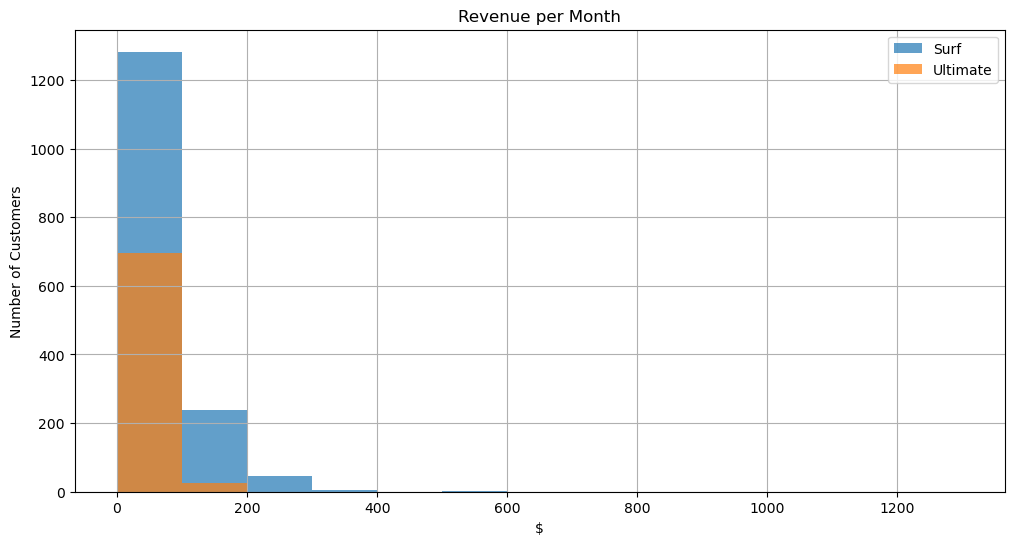

total revenue of Surf: 95491.18
total revenue of Ultimate: 52066.0


In [39]:
# Compare the revenue  of each plan require each month. Plot a histogram.

# Create and save how much surf plan revenue per month
total_surf_revenue = monthly_use_per_user[monthly_use_per_user['plan'] == 'surf']

total_surf_revenue['revenue'].plot(kind='hist',
                                   figsize=(12, 6),
                                   title='Revenue per Month',
                                   alpha=0.7,
                                   bins=bin_edges,
                                   grid=True,
                                   label='Surf')

# Create and save how much ultimate plan revenue per month
total_ult_revenue = monthly_use_per_user[monthly_use_per_user['plan'] == 'ultimate']

total_ult_revenue['revenue'].plot(kind='hist',
                                  figsize=(12, 6),
                                  title='Revenue per Month',
                                  alpha=0.7,
                                  bins=bin_edges,
                                  grid=True,
                                  label='Ultimate')
bin_edges = np.arange(20, 100, 10)
plt.title('Revenue per Month')
plt.xlabel('$')
plt.ylabel('Number of Customers')
plt.legend(loc='upper right')
plt.show()

print('total revenue of Surf:', total_surf_revenue['revenue'].sum())
print('total revenue of Ultimate:', total_ult_revenue['revenue'].sum())

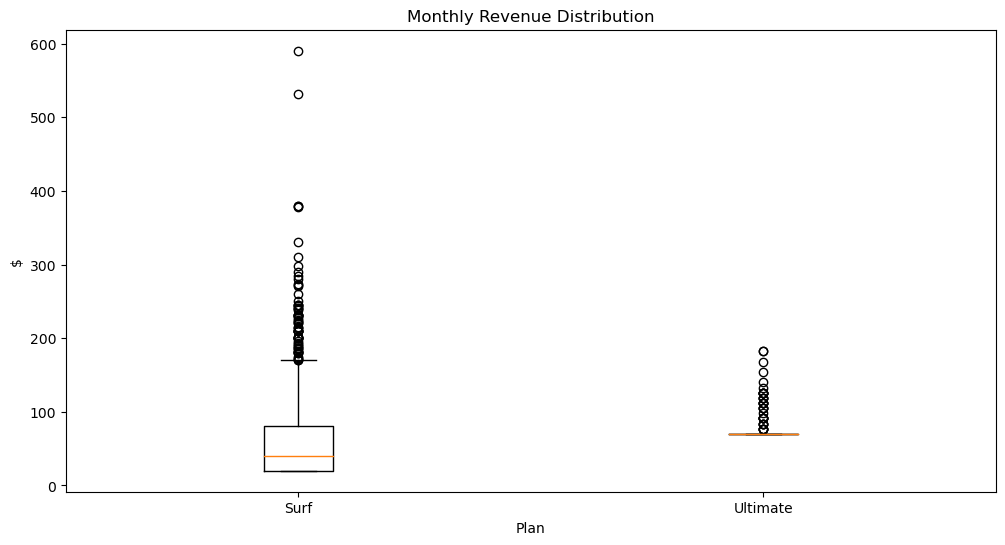

In [40]:
# Plot a boxplot to visualize the distribution of the revenue

# Filter data for surf and ultimate plans
surf_data_revenue = monthly_use_per_user[monthly_use_per_user['plan']
                                         == 'surf']['revenue']
ultimate_data_revenue = monthly_use_per_user[monthly_use_per_user['plan']
                                             == 'ultimate']['revenue']

# Create a list of data to plot
data_to_plot_revenue = [
    surf_data_revenue.dropna(), ultimate_data_revenue.dropna()]

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot_revenue, labels=['Surf', 'Ultimate'])
plt.title('Monthly Revenue Distribution')
plt.xlabel('Plan')
plt.ylabel('$')
plt.show()

  <div class="alert alert-info">
<li> On average, Ultimate plan revenue per user does not deviate far from their plan base of 70 dollars
<li> On average, Suf plan revenue per user increases steadily throughout the year and ultimately reaching 70 dollars at the end of the year
<li> Most Surf plan users does not deviate far from minimum plan cost of 20 dollars and more than 500 users use less than 30 dollars a month
<li> However, there are approximately 700 Surf plan users who use more than 30 dollars and of them apporximately 300 users use more than 70 dollars  
<li> Ultimate users tend to spend the base of 70 dollars and does not spend more than the base 

## Test statistical hypotheses

In [41]:
# Test the hypotheses
# H0= average revenue from users of Ultimate and Surf calling plans are equal
# H1= average revenue from users of Ultimate and Surf calling plans differs

ultimate_revenue = monthly_use_per_user[monthly_use_per_user['plan']
                                        == 'ultimate']['revenue']
surf_revenue = monthly_use_per_user[monthly_use_per_user['plan']
                                    == 'surf']['revenue']

alpha = 0.05

results = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis that average revenue from users of Ultimate and Surf calling plans are equal")
else:
    print("We can't reject the hypothesis that average revenue from users of Ultimate and Surf calling plans are equal")

p-value:  3.1703905481135734e-15
We reject the null hypothesis that average revenue from users of Ultimate and Surf calling plans are equal


In [42]:
# Test the hypotheses
# H0 = average revenue from users in NY-NJ area is same from tht of users from the other regions
# H1 = average revenue from users in NY-NJ area is differ from tht of users from the other regions

# merge regional information from users to monthly_use_per_user on user_id
monthly_use_city = monthly_use_per_user.merge(users, on='user_id', how='left')

# save NY-NJ revnue and other region
nynj_revenue = monthly_use_city[monthly_use_city['city'] ==
                                'New York-Newark-Jersey City, NY-NJ-PA MSA']['revenue']
other_reg_revenue = monthly_use_city[monthly_use_city['city']
                                     != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['revenue']

alpha = 0.05

results_city = st.ttest_ind(nynj_revenue, other_reg_revenue, equal_var=False)
print('p-value: ', results_city.pvalue)

if results_city.pvalue < alpha:
    print("We reject the null hypothesis that average revenue from users in NY-NJ area is same from that of users from the other regions")
else:
    print("We can't reject the hypothesis that average revenue from users in NY-NJ area is same from that of users from the other regions")

p-value:  0.0335256158853001
We reject the null hypothesis that average revenue from users in NY-NJ area is same from that of users from the other regions


## General conclusion

In [43]:
total_surf_num = monthly_use_per_user[monthly_use_per_user['plan']
                                      == 'surf']['user_id'].count()
total_ult_num = monthly_use_per_user[monthly_use_per_user['plan']
                                     == 'ultimate']['user_id'].count()
print('total Surf plan users: ', total_surf_num)
print('total Ultimate plan users: ', total_ult_num)
print()
avg_surf_rev = total_surf_revenue['revenue'].sum()/total_surf_num
avg_ult_rev = total_ult_revenue['revenue'].sum()/total_ult_num
print('average Surf plan revenue: ', avg_surf_rev)
print('average Ultimate plan revenue: ', avg_ult_rev)
print()
avg_surf_call = total_surf_used.sum()/total_surf_num
avg_ult_call = total_ult_used.sum()/total_ult_num
print('average Surf plan call used: ', avg_surf_call)
print('average Ultimate call used: ', avg_ult_call)
print()
avg_surf_txt = total_surf_used_msg['num_message'].sum()/total_surf_num
avg_ult_txt = total_ult_used_msg['num_message'].sum()/total_ult_num
print('average Surf plan text used: ', avg_surf_txt)
print('average Ultimate text used: ', avg_ult_txt)
print()
avg_surf_int = total_surf_used_int.sum()/total_surf_num
avg_ult_int = total_ult_used_int.sum()/total_ult_num
print('average Ultimate internet used: ', avg_surf_int)
print('average Ultimate internet used: ', avg_ult_int)

total Surf plan users:  1573
total Ultimate plan users:  720

average Surf plan revenue:  60.706408137317226
average Ultimate plan revenue:  72.31388888888888

average Surf plan call used:  428.7495232040687
average Ultimate call used:  430.45

average Surf plan text used:  31.15956770502225
average Ultimate text used:  37.55138888888889

average Ultimate internet used:  16.670692943420217
average Ultimate internet used:  17.306944444444444


  <div class="alert alert-info"> 
<li> An average Ultimate plan user's call usage is slightly lower than that of a Surf user per month except for in Feburary.</b>
<li> An average Ultimate user's usage of text or internet use is similar to that of a Surf plan user per month </b>
<li> All Surf users absoluate number of call duration, text, and internet usage is higher than that of Ultimate users. This can be due to sheer number of Surf users compared to Ultimate plan users. There are more than 2X Surf users than Ultimate users.</b>
<li> An average users usage of call, text, and internet shows slight upward trend as the year progress regardless of their plan </b>
<li> An average revenue for an Ultimate user doesn't grow over the year and stays between 70 dolasrs and 75 dollars
    <ul>
    <li> An average revenue for an Surf user has a upward trend as the year progress which aligns with usage of call, text, and internet.
    <li> This tells us that an average Ultimate user is unlikely to use beyond their plan provided limits, but Surf users are more likely to use beyond their plan provided limit
     </ul>
<li> Even though Surf plan users are more likely to use more than their provided plan, average of Ultimate plan revenue is higher than Surf plan. We can utilize this to promote to customers along the line of : most people need Ultimate plan since Surf plan users tend to use beyond plan limits.</b>
<li> There is statistically significant difference in the average revenue between the two plans. Average of Ultimate plan revenue is higher than average Surf plan revnue; adding more reason for us to promote Ulitmate plan to customers. </b>
<li> There is no statistical evidence for us to conculde that average revenue from users in NY-NJ area is same from  that of users from other areas. Hence, the target marketing in this area may not be effective as national wide marketing. </b>